# 1. Import the necessary libraries (2 marks)


In [92]:
# 1. Import the necessary libraries (2 marks)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ztest
sns.set(color_codes=True)
%matplotlib inline

# 2. Read the data as a data frame (2 marks)


In [93]:
# 2. Read the data as a data frame (2 marks)
df = pd.read_csv("insurance (2).csv")

# 3. Perform basic EDA which should include the following and print out your insights at every step. (28 marks)

## a. Shape of the data (2 marks)


In [94]:
# a. Shape of the data (2 marks)
df.shape
print("The shape of the dataset is", df.shape, "rows and columns respectively")

The shape of the dataset is (1338, 7) rows and columns respectively


## b. Data type of each attribute (2 marks)


In [95]:
# b. Data type of each attribute (2 marks)
df.info()
#### The output of the above command shows the datatype of 
# age is int, 
# sex is Object, 
# bmi is float, 
# children is int,
# smoker is object,
# region is object and 
# the datatype of charges is in float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## c. Checking the presence of missing values (3 marks)


In [96]:
# c. Checking the presence of missing values (3 marks)
# df.info() shows that there are no columns with missing values. All columns have "Non-null" count = 1338, which indicates 
# no missing values.
print("Are there any missing values in the dataset?", df.isnull==True)
df.isna()

Are there any missing values in the dataset? False


,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


## d. 5 point summary of numerical attributes (3 marks)


In [97]:
# d. 5 point summary of numerical attributes (3 marks)
df.describe()
# This shows the 5 point summary of age, bmi, children and charges which are the numerical attributes in the dataset.
## Age of the dataset is between 18 and 64 years, Median age is 39 years, 1st Quartile=27 and 3rd Quartile=51
## BMI is between 15.96 and 53.13 with median bmi=30.4, 1st Quartile=26.30 and 3rd Quartile=34.69
## Children is between 0 and 5 with median = 1, 1st Quartile=0, 3rd Quartile=2
## Charges is between ~1121 and ~63770, with median~9382, 1st Quartile~4740 and 3rd Quartile~16639

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [98]:
# Printing 5 Point Summary... Continued.
print("5 Point Summary")
print("Age: ", "min=",df.age.min(),"\n", "1st Quartile=", df.age.quantile(0.25),"\n", "Median=",df.age.median(),"\n", "3rd Quartile=", df.age.quantile(0.75),"\n",  "Max=",df.age.max())
print("bmi: ", "min=",df.bmi.min(),"\n", "1st Quartile=", df.bmi.quantile(0.25),"\n", "Median=",df.bmi.median(),"\n", "3rd Quartile=", df.bmi.quantile(0.75),"\n",  "Max=",df.bmi.max())
print("children: ", "min=",df.children.min(),"\n", "1st Quartile=", df.children.quantile(0.25),"\n", "Median=",df.children.median(),"\n", "3rd Quartile=", df.children.quantile(0.75),"\n",  "Max=",df.children.max())
print("charges: ", "min=",df.charges.min(),"\n", "1st Quartile=", df.charges.quantile(0.25),"\n", "Median=",df.charges.median(),"\n", "3rd Quartile=", df.charges.quantile(0.75),"\n",  "Max=",df.charges.max())

5 Point Summary
Age:  min= 18 
 1st Quartile= 27.0 
 Median= 39.0 
 3rd Quartile= 51.0 
 Max= 64
bmi:  min= 15.96 
 1st Quartile= 26.29625 
 Median= 30.4 
 3rd Quartile= 34.69375 
 Max= 53.13
children:  min= 0 
 1st Quartile= 0.0 
 Median= 1.0 
 3rd Quartile= 2.0 
 Max= 5
charges:  min= 1121.8739 
 1st Quartile= 4740.28715 
 Median= 9382.033 
 3rd Quartile= 16639.912515 
 Max= 63770.42801


## e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)


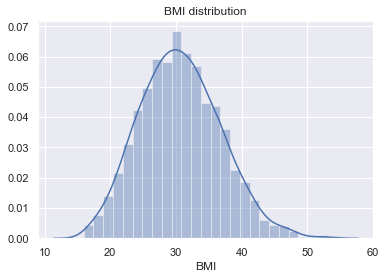

Insight: The distribution of BMI looks to be an approximate normal distribution with little right skewness


In [99]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)
sns.distplot(df.bmi);
plt.xlabel('BMI')
plt.title('BMI distribution')
plt.show()
print('Insight: The distribution of BMI looks to be an approximate normal distribution with little right skewness')

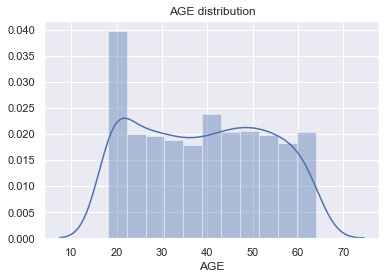

Insight: The AGE looks to be evenly distributed with the mode at 18 years, i.e. the dataset has people from all ages


In [100]:
sns.distplot(df.age);
plt.xlabel('AGE')
plt.title('AGE distribution')
plt.show()
print('Insight: The AGE looks to be evenly distributed with the mode at 18 years, i.e. the dataset has people from all \
ages')

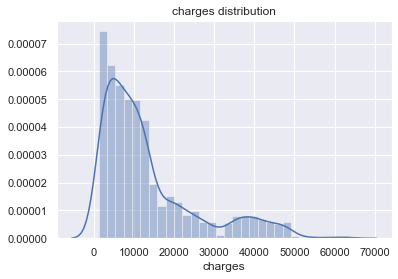

The distribution is heavily skewed on the right
Insight: Most number of people are paying lower charges for healthcare and the frequency goes down as the charges increase


In [101]:
sns.distplot(df.charges);
plt.xlabel('charges')
plt.title('charges distribution')
plt.show()
print('The distribution is heavily skewed on the right')
print('Insight: Most number of people are paying lower charges for healthcare and the frequency goes down as the charges \
increase')

## f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)


In [102]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)
print("Skewness for bmi =",df.skew().bmi.round(4))
print("Skewness for age =",df.skew().age.round(4))
print("Skewness for charges =",df.skew().charges.round(4))

print('Insight: The outputs show the age data is not much skewed, BMI is little skewed and Charges is largely positively \
skewed.')

Skewness for bmi = 0.284
Skewness for age = 0.0557
Skewness for charges = 1.5159
Insight: The outputs show the age data is not much skewed, BMI is little skewed and Charges is largely positively skewed.


## g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)

### Insights:
 1. Box plot for BMI shows the bmi data has some outliers on the higher BMI numbers above 46 units
 2. Box plot for AGE shows the age data has doesn't have any outliers
 3. Box plot for Charges shows the charges data has lot of outliers on the higher charges above 35000

Insight: Box plot shows the bmi data has some outliers on the higher BMI numbers above 46 units


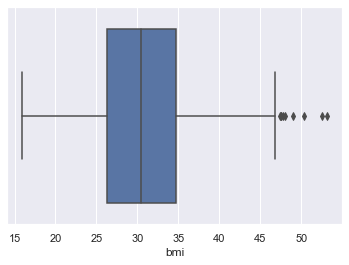

In [103]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)
sns.boxplot(df['bmi']);
print("Insight: Box plot shows the bmi data has some outliers on the higher BMI numbers above 46 units")

Insight: Box plot shows the age data has doesn't have any outliers


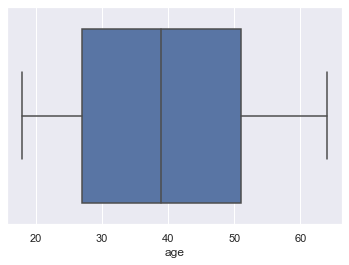

In [104]:
sns.boxplot(df['age']);
print("Insight: Box plot shows the age data has doesn't have any outliers")

Insight: Box plot shows the charges data has lot of outliers for higher charges above 35000


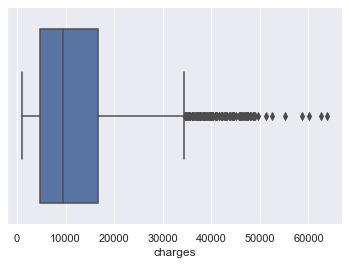

In [105]:
sns.boxplot(df['charges']);
print("Insight: Box plot shows the charges data has lot of outliers for higher charges above 35000")

## h. Distribution of categorical columns (include children) (4 marks)

### Insights: 
 1. Smokers consistently have high charges for health insurance compared to non-smokers across both genders.
 2. Mostly Males who smoke have higher charges for health insurance compared to females smokers.
 3. For Non-smokers, the charges are seen increasing with the number of children(dependents) across both genders

Insights: 
  1. Smokers consistently have high charges for health insurance compared to non-smokers across both genders.
  2. Mostly Males who smoke have higher charges for health insurance compared to females smokers. 
  3. For Non-smokers, the charges are seen increasing with the number of children(dependents) across both genders


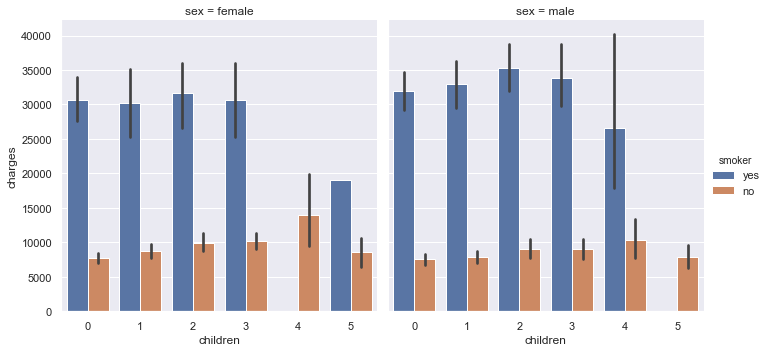

In [106]:
# h. Distribution of categorical columns (include children) (4 marks)
sns.catplot(x='children',y='charges',col='sex',hue='smoker',data=df,kind='bar');
print('Insights: \n \
 1. Smokers consistently have high charges for health insurance compared to non-smokers across both genders.\n \
 2. Mostly Males who smoke have higher charges for health insurance compared to females smokers. \n \
 3. For Non-smokers, the charges are seen increasing with the number of children(dependents) across both genders')

### .. Continued.. Distribution of categorical columns.

### Insights: 
 1. Smokers have consistently high charges for health insurance across all regions and sex compared to non-smokers
 2. Males who smoke have higher charges for health insurance compared to female smokers in the same region
 3. Among Non-smokers females have higher charges for health insuranc compared to males across all regions.

Insights: 
 1. Smokers have consistently high charges for health insurance across all regions and sex compared to non-smokers. 
 2. Males who smoke have higher charges for health insurance compared to female smokers in the same region. 
 3. Among Non-smokers females have higher charges for health insuranc compared to males across all regions.


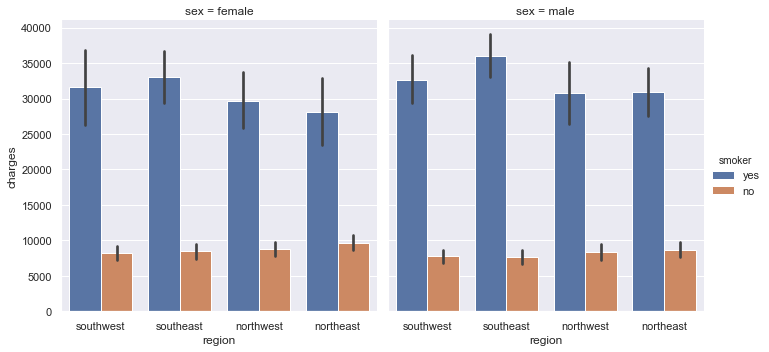

In [107]:
# .. Continued.. Distribution of categorical columns.
sns.catplot(x='region',y='charges',col='sex',hue='smoker',data=df,kind='bar');
print('Insights: \n \
1. Smokers have consistently high charges for health insurance across all regions and sex compared to non-smokers. \n \
2. Males who smoke have higher charges for health insurance compared to female smokers in the same region. \n \
3. Among Non-smokers females have higher charges for health insuranc compared to males across all regions.')

## i. Pair plot that includes all the columns of the data frame (4 marks)


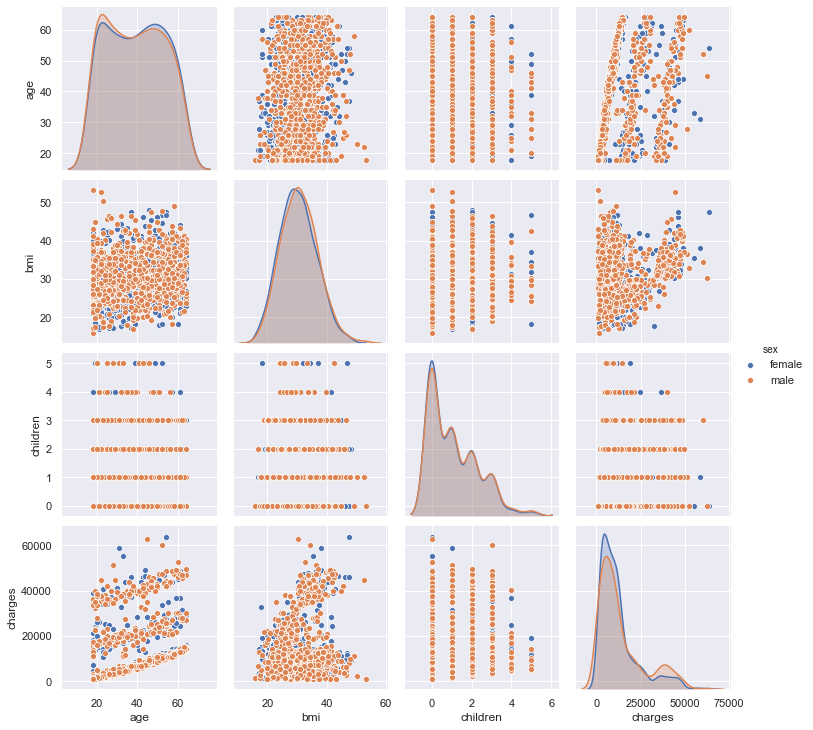

In [108]:
# i. Pair plot that includes all the columns of the data frame (4 marks)
sns.pairplot(df, hue='sex');

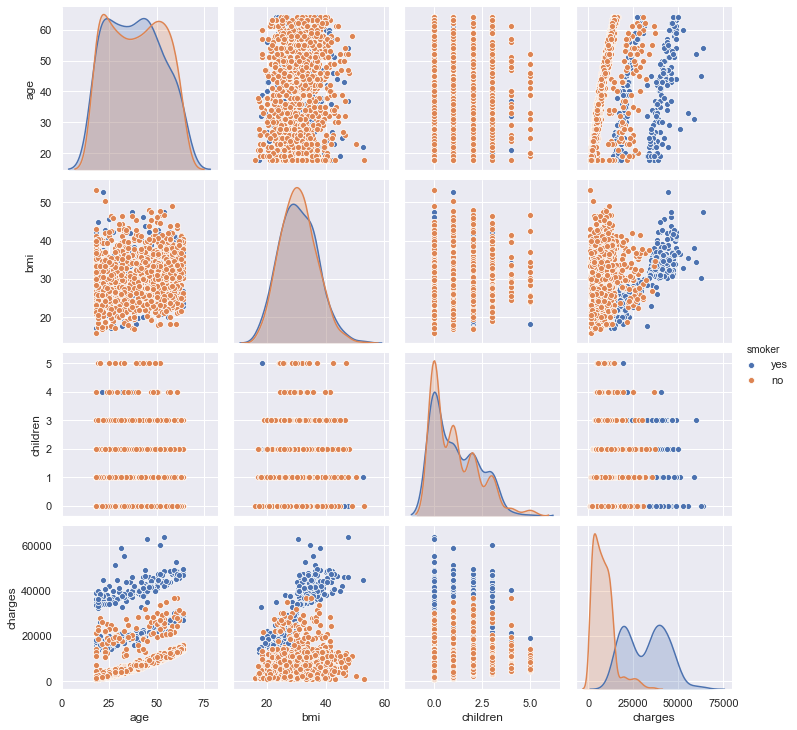

In [109]:
sns.pairplot(df, hue='smoker');

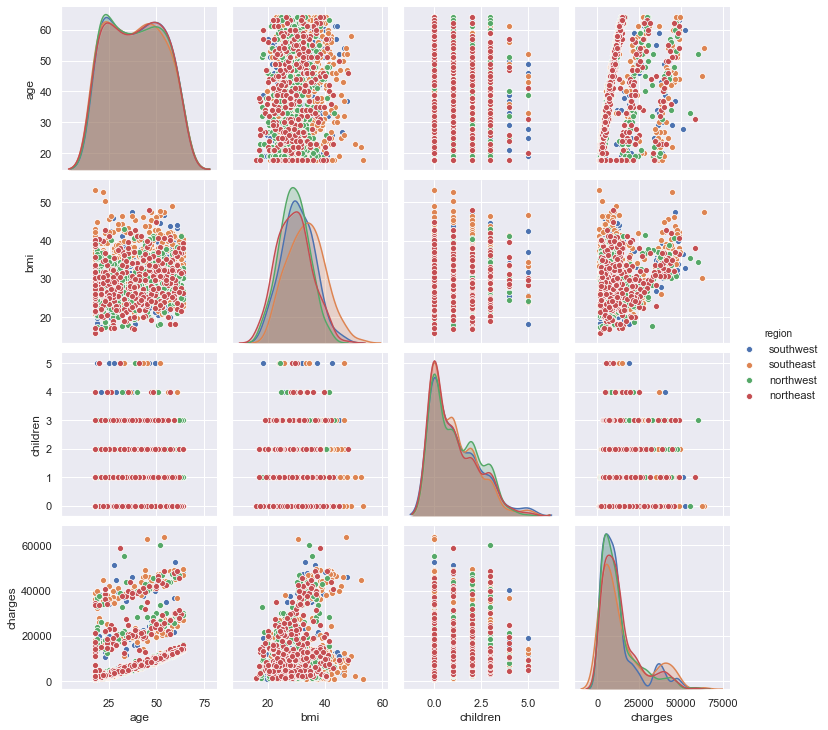

In [110]:
sns.pairplot(df, hue='region');

# 4. Answer the following questions with statistical evidence (28 marks)


## a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)


In [111]:
df.groupby('smoker').charges.describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


#### This shows the average charges of non-smokers is less than the minimum charges of that of a smoker. 
And the charges for Smoker are pretty high compared to that of a Non-Smoker.
Lets do some Hypothesis testing to check if this difference is statistically significant.

### Hypothesis Testing

### Step 1: State the Hypothesis
#### Ho: Charges for Smoker and Non-Smokers are the same
#### Ha: Charges for Smoker and Non-Smokers are different

### Step 2: Fix the Significance level

α = 0.05

In [112]:
a = 0.05 #Signifance level

In [113]:
smoker = df[df['smoker']=='yes'].charges
non_smoker = df[df['smoker']=='no'].charges
print(smoker.describe())
print(non_smoker.describe())

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64
count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64


### Step 3: Calculate the p value 

In [114]:
t_statistic, p_value = ttest_ind(smoker, non_smoker)
print("t_statistic=",t_statistic, "p_value=",p_value)

t_statistic= 46.664921172723716 p_value= 8.271435842177219e-283


### Step 4: Decide to reject or fail to reject the Null Hypothesis

In [115]:
# If p_value < alpha, Null hypothesis is rejected and alternative hypothesis is valid.
if p_value < a:
    print ("Null Hyphothesis is rejected")
    print ("The Charges for Smoker and Non-Smokers are significantly different")
    print ("The t-test p-value=", p_value)
else:
    print ("We fail to reject the Null Hyphothesis")
    print ("The Charges for Smoker and Non-Smokers are NOT significantly different")
    print ("The t-test p-value=", p_value)

Null Hyphothesis is rejected
The Charges for Smoker and Non-Smokers are significantly different
The t-test p-value= 8.271435842177219e-283


In [116]:
# Even with the signifance level of alpha = 0.01, the Null Hypothesis is rejected.
a = 0.01
if p_value < a:
    print ("Null Hyphothesis is rejected")
    print ("The Charges for Smoker and Non-Smokers are significantly different")
    print ("The t-test p-value=", p_value)
else:
    print ("We fail to reject the Null Hyphothesis")
    print ("The Charges for Smoker and Non-Smokers are NOT significantly different")
    print ("The t-test p-value=", p_value)

Null Hyphothesis is rejected
The Charges for Smoker and Non-Smokers are significantly different
The t-test p-value= 8.271435842177219e-283


## Result: The charges of people who smoke differ significantly from the people who don't.

=========================================================================================================================

## b. Does bmi of males differ significantly from that of females? (7 marks)

In [117]:
df.groupby('sex').bmi.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


#### Looking at the mean, median and standard deviation, there is very minor difference between the BMI of Males vs Females

Lets do some hypothesis testing to check if this is statistically significant.

### Hypothesis Testing

### Step 1: State the Hypothesis
#### Ho: BMI for Males and Females are the same
#### Ha: BMI for Males and Females are not the same

### Step 2: Fix the Significance level

α = 0.05

In [118]:
a = 0.05

In [119]:
males = df[df['sex']=='male'].bmi
females = df[df['sex']=='female'].bmi
print(males.describe())
print(females.describe())

count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64
count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64


### Step 3: Calculate the p value 


In [120]:
z_statistic, p_value = ztest(males, females)
print ("Z-test p-value", p_value)
print ("Zstatistic=", z_statistic)

Z-test p-value 0.08974343679943912
Zstatistic= 1.6967526357522242


### Step 4: Decide to reject or fail to reject the Null Hypothesis


In [121]:
# If p_value < alpha, Null hypothesis is rejected and alternative hypothesis is valid.
if p_value < a:
    print ("Null Hyphothesis is rejected")
    print ("The BMI of males and females is significantly different")
    print ("The Z-test p-value=", p_value)
else:
    print ("We fail to reject the Null Hyphothesis")
    print ("The BMI of males and females is NOT significantly different. Or the bmi values for males and females are same")
    print ("The Z-test p-value=", p_value)

We fail to reject the Null Hyphothesis
The BMI of males and females is NOT significantly different. Or the bmi values for males and females are same
The Z-test p-value= 0.08974343679943912


We get the same result from T-test as well

In [122]:
t_statistic, p_value = ttest_ind(males, females)
print("t_statistic=",t_statistic, "p_value=",p_value)

t_statistic= 1.696752635752224 p_value= 0.08997637178984932


## Result: The bmi of males does not differ significantly from that of females

=========================================================================================================================

## c. Is the proportion of smokers significantly different in different genders? (7 marks)

In [123]:
male_smokers = df[df['sex']=='male'].smoker.value_counts()[1]
female_smokers = df[df['sex']=='female'].smoker.value_counts()[1]
males=df[df['sex']=='male'].count()[1]
females=df[df['sex']=='female'].count()[1]

In [124]:
print("female smokers=",female_smokers)
print("male smokers=", male_smokers)
print("number of males",males)
print("number of females",females)

female smokers= 115
male smokers= 159
number of males 676
number of females 662


In [125]:
print("Proportion of Male smokers against total males=",round(male_smokers*100/males,2),"%")
print("Proportion of Female smokers against total Females=",round(female_smokers*100/females,2),"%")

Proportion of Male smokers against total males= 23.52 %
Proportion of Female smokers against total Females= 17.37 %


### Hypothesis Testing
* Now, we want to test if the proportion of smokers in the female population is significantly less than it is in the male population

### Step 1: State the Hypothesis
#### Ho = The proportion of smokers in males and females are equal
#### Ha = The proportion of smokers in males and females are not equal

### Step 2: Fix the significance level
α = 0.05

In [126]:
a = 0.05

### Step 3: Calculate the p value 


In [127]:
zstat, p_value = proportions_ztest([female_smokers, male_smokers] , [females, males])
print("The Ztest p_value is", p_value)
print("Zstat is ", zstat)

The Ztest p_value is 0.005324114164320532
Zstat is  -2.7867402154855503


### Step 4: Decide to reject or fail to reject the Null Hypothesis

In [128]:
# If p_value < alpha, Null hypothesis is rejected and alternative hypothesis is valid.
if p_value < a:
    print ("Null Hyphothesis is rejected")
    print ("The proportion of smokers in males and females are not equal")
    print ("The Ztest p-value=", p_value)
else:
    print ("We fail to reject the Null Hyphothesis")
    print ("The proportion of smokers in males and females are equal")
    print ("The Ztest p-value=", p_value)

Null Hyphothesis is rejected
The proportion of smokers in males and females are not equal
The Ztest p-value= 0.005324114164320532


## Result: The proportion of smokers significantly different in different genders.

=========================================================================================================================

## d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

In [129]:
df_0child = df[df['children']==0]
df_1child = df[df['children']==1]
df_2child = df[df['children']==2]

In [130]:
print(df_0child)
print(df_1child)
print(df_2child)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
9      60  female  25.840         0     no  northwest  28923.13692
...   ...     ...     ...       ...    ...        ...          ...
1331   23  female  33.400         0     no  southwest  10795.93733
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[574 rows x 7 columns]
      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
6      46  female  33.440         1   

In [131]:
female_0child = df_0child[df_0child['sex']=='female']
female_1child = df_1child[df_1child['sex']=='female']
female_2child = df_2child[df_2child['sex']=='female']
print(female_0child)
print(female_1child)
print(female_2child)

      age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
5      31  female  25.74         0     no  southeast   3756.62160
9      60  female  25.84         0     no  northwest  28923.13692
11     62  female  26.29         0    yes  southeast  27808.72510
13     56  female  39.82         0     no  southeast  11090.71780
...   ...     ...    ...       ...    ...        ...          ...
1331   23  female  33.40         0     no  southwest  10795.93733
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500
1337   61  female  29.07         0    yes  northwest  29141.36030

[289 rows x 7 columns]
      age     sex     bmi  children smoker     region      charges
6      46  female  33.440         1     no  southeast   8240.58960
16     52  female  30.780         1     no  northe

In [132]:
new_df = pd.concat([female_0child, female_1child, female_2child])
new_df.sex.value_counts()
new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
13,56,female,39.82,0,no,southeast,11090.71780


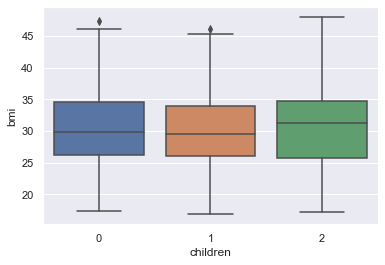

In [133]:
sns.boxplot(x='children',y='bmi', data=new_df);
# Box plot indicates bmi ditribution for females with 0,1 and 2 children are nearly the same.

## Hypothesis Testing
### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean bmi values for women with 0 child, 1 child and 2 children respectively.

### Step 2: Decide the significance level

α = 0.05

In [134]:
a = 0.05

### Step 3: Calculate p value using ANOVA table

In [135]:
mod = ols('bmi ~ children', data = new_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
p_value = aov_table.loc['children','PR(>F)']

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


### Step 5:  Decide to reject or accept null hypothesis

In [136]:
if p_value < a:
    print ("Null Hyphothesis is rejected")
    print ("At least one of the means is different")
    print ("The AVOVA test p-value=", p_value)
else:
    print ("We fail to reject the Null Hyphothesis")
    print ("The mean values of bmi across women with no children, one child and two children are the same")
    print ("The AVOVA p-value=", p_value)

We fail to reject the Null Hyphothesis
The mean values of bmi across women with no children, one child and two children are the same
The AVOVA p-value= 0.7937600294537167


## Result: The distribution of bmi across women with no children, one child and two children is the same and the difference is not statistically significant

In [137]:
# Also proven from the below Turkey-krammer HSD test, that the bmi distribution of the 3 categories of women based on the-
# - number of children (0,1,2) are statistically equal.

from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(new_df['bmi'], new_df['children']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8494 -1.7186 1.1008  False
     0      2   0.2883 0.8942 -1.2636 1.8402  False
     1      2   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------
